In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

sns.set()

from sklearn.preprocessing import StandardScaler, RobustScaler

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [240]:
df = pd.read_excel('C:\\Users\\Muhammad Hazim\\Desktop\\Bank_Personal_Loan_Modelling.xlsx', sheet_name = "Data")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [241]:
df.isnull().any().any()

False

In [242]:
df.drop(['ID','ZIP Code'], axis = 1, inplace = True)

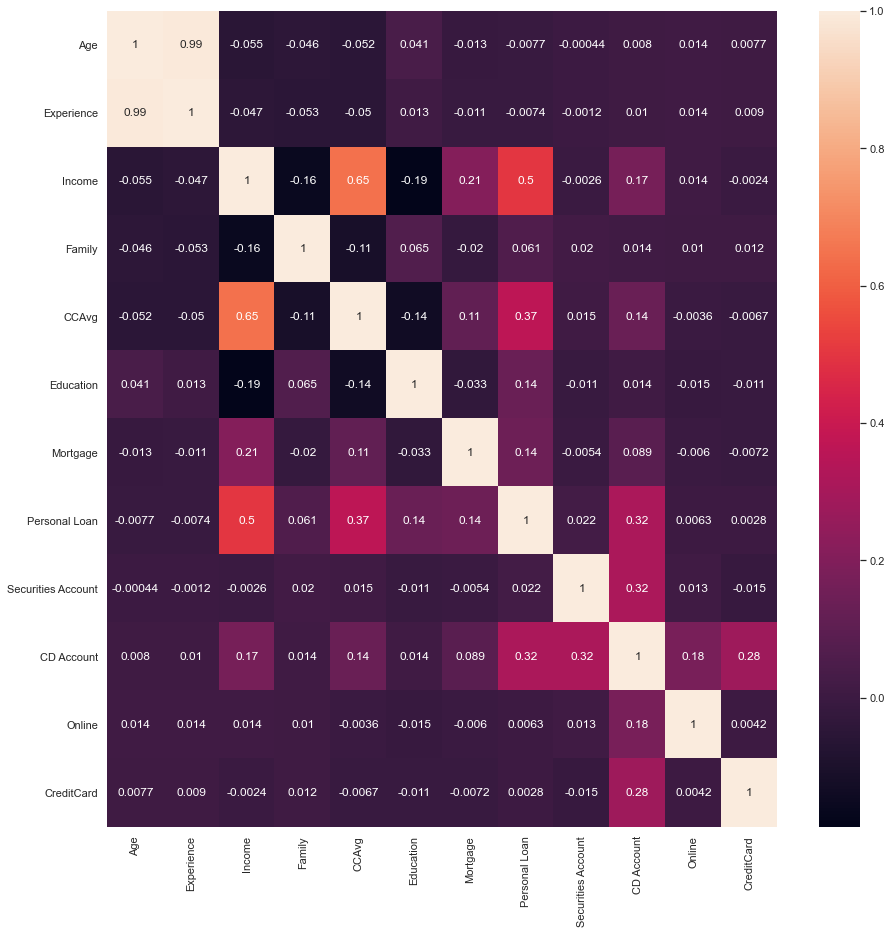

In [243]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True)

In [244]:
cat_feat = []

for column in df.columns.values:
    if (column != 'Personal Loan') & (df[column].dtypes == 'O'):
        cat_feat.append(column)   
        
numd_feat = []

for column in df.columns.values:
    if (column != 'Personal Loan') & (df[column].dtypes == 'int64'):
        numd_feat.append(column) 

numf_feat = []

for column in df.columns.values:
    if (column != 'Personal Loan') & (df[column].dtypes == 'float64'):
        numf_feat.append(column)

0    4520
1     480
Name: Personal Loan, dtype: int64

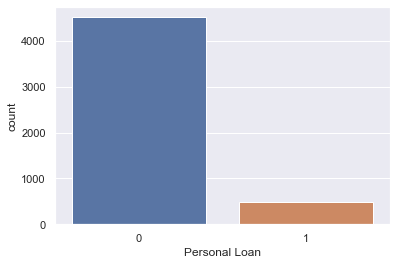

In [245]:
sns.countplot(df['Personal Loan'])
df['Personal Loan'].value_counts()

In [246]:
def plot_bar(column):
    table = pd.DataFrame()
    table['Reject'] = df[df['Personal Loan'] == 0][column].value_counts()
    table['Accept'] = df[df['Personal Loan'] == 1][column].value_counts()
    table.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and Personal Loan'.format(column))
    plt.show();

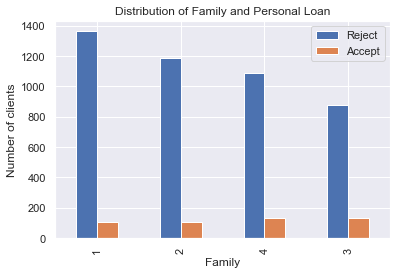

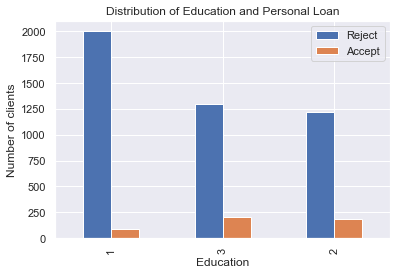

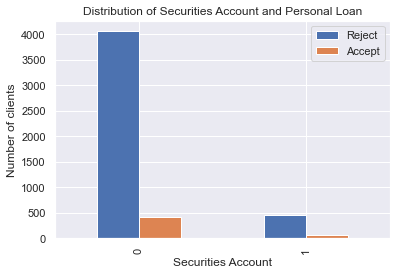

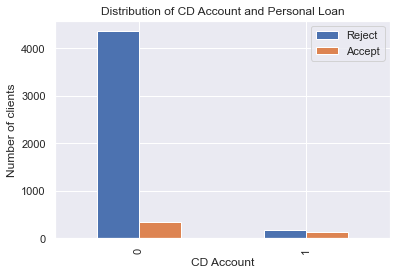

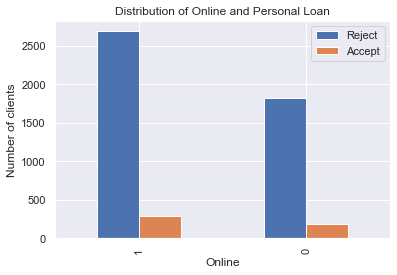

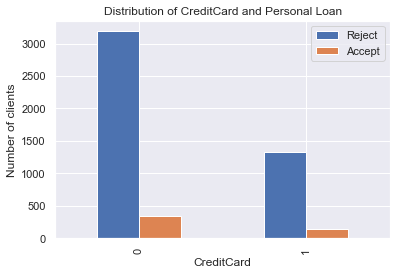

(None, None, None, None, None, None)

In [247]:
plot_bar('Family'), plot_bar('Education'), plot_bar('Securities Account'), plot_bar('CD Account'),  plot_bar('Online'), plot_bar('CreditCard')

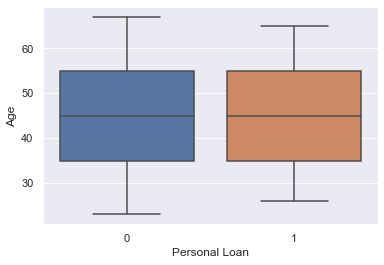

In [248]:
sns.boxplot(df['Personal Loan'], df['Age'])

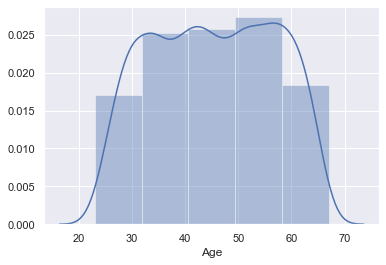

In [249]:
sns.distplot(df['Age'], bins = 5)

In [250]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Personal Loan']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Personal Loan
0,"(22.956, 31.8]",0.097463
1,"(31.8, 40.6]",0.099910
2,"(40.6, 49.4]",0.096290
3,"(49.4, 58.2]",0.090682
4,"(58.2, 67.0]",0.096774


In [251]:
df.loc[ df['Age'] <= 31.8, 'Age'] = 1
df.loc[(df['Age'] > 31.8) & (df['Age'] <= 40.6), 'Age'] = 2
df.loc[(df['Age'] > 40.6) & (df['Age'] <= 49.4), 'Age'] = 3
df.loc[(df['Age'] > 49.4) & (df['Age'] <= 58.2), 'Age'] = 4
df.loc[ df['Age'] > 58.2, 'Age'] = 5
df = df.drop(['AgeBand'], axis=1)

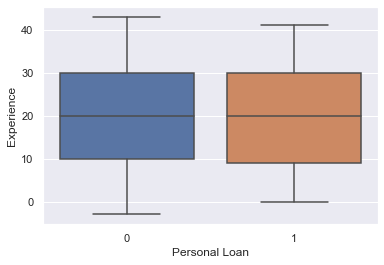

In [252]:
sns.boxplot(df['Personal Loan'], df['Experience'])

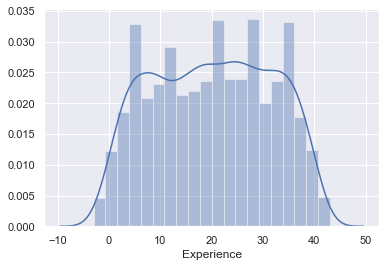

In [253]:
sns.distplot(df['Experience'])

In [254]:
df['ExperienceBand'] = pd.cut(df['Experience'], 5)
df[['ExperienceBand', 'Personal Loan']].groupby(['ExperienceBand'], as_index=False).mean().sort_values(by='ExperienceBand', ascending=True)

,ExperienceBand,Personal Loan
0,"(-3.046, 6.2]",0.096939
1,"(6.2, 15.4]",0.099448
2,"(15.4, 24.6]",0.094595
3,"(24.6, 33.8]",0.091924
4,"(33.8, 43.0]",0.098465


In [255]:
df.loc[ df['Experience'] <= 6.2, 'Experience'] = 1
df.loc[(df['Experience'] > 15.4) & (df['Experience'] <= 24.6), 'Experience'] = 2
df.loc[(df['Experience'] > 24.6) & (df['Experience'] <= 33.8), 'Experience'] = 3
df.loc[(df['Experience'] > 33.8) & (df['Experience'] <= 43.0), 'Experience'] = 4
df.loc[ df['Experience'] > 43.0, 'Age'] = 5
df = df.drop(['ExperienceBand'], axis=1)

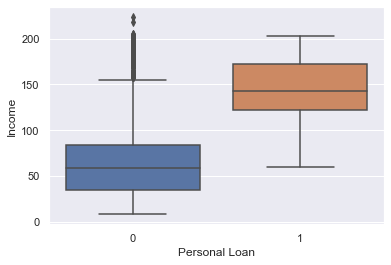

In [256]:
sns.boxplot(df['Personal Loan'], df['Income'])

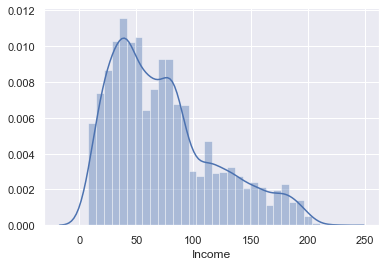

In [257]:
sns.distplot(df['Income'])

In [258]:
df['IncomeBand'] = pd.cut(df['Income'], 5)
df[['IncomeBand', 'Personal Loan']].groupby(['IncomeBand'], as_index=False).mean().sort_values(by='IncomeBand', ascending=True)

,IncomeBand,Personal Loan
0,"(7.784, 51.2]",0.000000
1,"(51.2, 94.4]",0.017755
2,"(94.4, 137.6]",0.255848
3,"(137.6, 180.8]",0.421505
4,"(180.8, 224.0]",0.520000


In [259]:
df = df.drop(['IncomeBand'], axis=1)

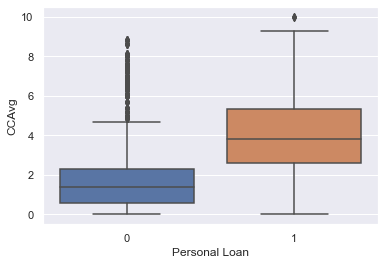

In [217]:
sns.boxplot(df['Personal Loan'], df['CCAvg'])

In [262]:
df['CCAvgBand'] = pd.cut(df['CCAvg'], 5)
df[['CCAvgBand', 'Personal Loan']].groupby(['CCAvgBand'], as_index=False).mean().sort_values(by='CCAvgBand', ascending=True)

,CCAvgBand,Personal Loan
0,"(-0.01, 2.0]",0.029566
1,"(2.0, 4.0]",0.135495
2,"(4.0, 6.0]",0.469256
3,"(6.0, 8.0]",0.306931
4,"(8.0, 10.0]",0.358974


In [263]:
df = df.drop(['CCAvgBand'], axis=1)

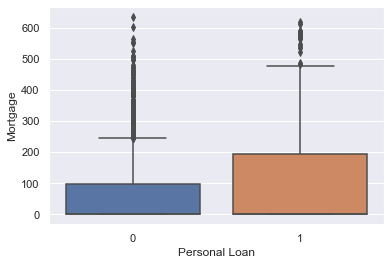

In [218]:
sns.boxplot(df['Personal Loan'], df['Mortgage'])

In [264]:
df['MortgageBand'] = pd.cut(df['Mortgage'], 5)
df[['MortgageBand', 'Personal Loan']].groupby(['MortgageBand'], as_index=False).mean().sort_values(by='MortgageBand', ascending=True)

,MortgageBand,Personal Loan
0,"(-0.635, 127.0]",0.083519
1,"(127.0, 254.0]",0.075556
2,"(254.0, 381.0]",0.263682
3,"(381.0, 508.0]",0.348485
4,"(508.0, 635.0]",0.695652


In [265]:
df = df.drop(['MortgageBand'], axis=1)

In [266]:
std_scaler = StandardScaler()

In [267]:
x = df.drop("Personal Loan", axis=1)
y = df["Personal Loan"]

In [268]:
x_scaled = std_scaler.fit_transform(x)

In [269]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.15, random_state = 42, stratify = y)

In [270]:
def score(model):
    df1 = pd.DataFrame(index = ['Accuracy', 'Precision', 'ROC AUC'] )
    df1['Train Score'] = [accuracy_score(y_train, model.predict(x_train)), precision_score(y_train, model.predict(x_train)), roc_auc_score(y_train, model.predict_proba(x_train)[:,1])]
    df1['Test Score'] = [accuracy_score(y_test, model.predict(x_test)), precision_score(y_test, model.predict(x_test)), roc_auc_score(y_test, model.predict_proba(x_test)[:,1])]        
    return df1

In [271]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [272]:
score(lr)

,Train Score,Test Score
Accuracy,0.952471,0.954667
Precision,0.832258,0.827586
ROC AUC,0.958204,0.963844


In [273]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [274]:
score(dt)

,Train Score,Test Score
Accuracy,0.988000,0.992000
Precision,0.945137,0.945946
ROC AUC,0.998115,0.998484


In [287]:
rf = RandomForestClassifier(max_depth=6)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6)

In [288]:
score(rf)

,Train Score,Test Score
Accuracy,0.988706,0.992000
Precision,0.991803,0.985294
ROC AUC,0.998861,0.998546


In [277]:
mlp = MLPClassifier(max_iter = 80, hidden_layer_sizes = 20)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=20, max_iter=80)

In [278]:
score(mlp)

,Train Score,Test Score
Accuracy,0.976706,0.980000
Precision,0.947826,0.890411
ROC AUC,0.988801,0.992236


In [279]:
cb = CatBoostClassifier(learning_rate = 0.001)
cb.fit(x_train, y_train)

0:	learn: 0.6910194	total: 14.6ms	remaining: 14.6s
1:	learn: 0.6889051	total: 27.8ms	remaining: 13.9s
2:	learn: 0.6868591	total: 35.3ms	remaining: 11.7s
3:	learn: 0.6843133	total: 42ms	remaining: 10.5s
4:	learn: 0.6825376	total: 49.8ms	remaining: 9.91s
5:	learn: 0.6805469	total: 56.4ms	remaining: 9.34s
6:	learn: 0.6787141	total: 64.7ms	remaining: 9.17s
7:	learn: 0.6767358	total: 69.7ms	remaining: 8.64s
8:	learn: 0.6749592	total: 74.8ms	remaining: 8.23s
9:	learn: 0.6722083	total: 81.2ms	remaining: 8.04s
10:	learn: 0.6694119	total: 88.6ms	remaining: 7.96s
11:	learn: 0.6674649	total: 94.9ms	remaining: 7.82s
12:	learn: 0.6655019	total: 101ms	remaining: 7.69s
13:	learn: 0.6636352	total: 108ms	remaining: 7.59s
14:	learn: 0.6618271	total: 114ms	remaining: 7.5s
15:	learn: 0.6594779	total: 121ms	remaining: 7.43s
16:	learn: 0.6574429	total: 127ms	remaining: 7.36s
17:	learn: 0.6546633	total: 134ms	remaining: 7.29s
18:	learn: 0.6527049	total: 139ms	remaining: 7.19s
19:	learn: 0.6503839	total: 146m

166:	learn: 0.4075501	total: 1.28s	remaining: 6.41s
167:	learn: 0.4063013	total: 1.29s	remaining: 6.4s
168:	learn: 0.4049824	total: 1.3s	remaining: 6.4s
169:	learn: 0.4038350	total: 1.31s	remaining: 6.41s
170:	learn: 0.4024435	total: 1.33s	remaining: 6.44s
171:	learn: 0.4014256	total: 1.34s	remaining: 6.47s
172:	learn: 0.4003925	total: 1.35s	remaining: 6.47s
173:	learn: 0.3993801	total: 1.36s	remaining: 6.46s
174:	learn: 0.3979794	total: 1.37s	remaining: 6.48s
175:	learn: 0.3968108	total: 1.38s	remaining: 6.48s
176:	learn: 0.3953191	total: 1.39s	remaining: 6.47s
177:	learn: 0.3943004	total: 1.4s	remaining: 6.47s
178:	learn: 0.3932764	total: 1.42s	remaining: 6.51s
179:	learn: 0.3920778	total: 1.44s	remaining: 6.55s
180:	learn: 0.3909223	total: 1.45s	remaining: 6.56s
181:	learn: 0.3898988	total: 1.46s	remaining: 6.58s
182:	learn: 0.3888905	total: 1.47s	remaining: 6.57s
183:	learn: 0.3877166	total: 1.48s	remaining: 6.57s
184:	learn: 0.3865174	total: 1.5s	remaining: 6.6s
185:	learn: 0.3852

326:	learn: 0.2572078	total: 2.97s	remaining: 6.12s
327:	learn: 0.2563152	total: 2.98s	remaining: 6.1s
328:	learn: 0.2556984	total: 2.99s	remaining: 6.09s
329:	learn: 0.2547155	total: 2.99s	remaining: 6.08s
330:	learn: 0.2541358	total: 3s	remaining: 6.07s
331:	learn: 0.2532426	total: 3.01s	remaining: 6.05s
332:	learn: 0.2524689	total: 3.02s	remaining: 6.04s
333:	learn: 0.2517925	total: 3.02s	remaining: 6.03s
334:	learn: 0.2508159	total: 3.03s	remaining: 6.02s
335:	learn: 0.2502711	total: 3.04s	remaining: 6.01s
336:	learn: 0.2495333	total: 3.05s	remaining: 6s
337:	learn: 0.2490426	total: 3.06s	remaining: 5.99s
338:	learn: 0.2483989	total: 3.06s	remaining: 5.97s
339:	learn: 0.2474546	total: 3.07s	remaining: 5.96s
340:	learn: 0.2465270	total: 3.08s	remaining: 5.95s
341:	learn: 0.2458970	total: 3.08s	remaining: 5.94s
342:	learn: 0.2452821	total: 3.09s	remaining: 5.92s
343:	learn: 0.2445492	total: 3.1s	remaining: 5.91s
344:	learn: 0.2437032	total: 3.11s	remaining: 5.9s
345:	learn: 0.2430928

492:	learn: 0.1623646	total: 4.18s	remaining: 4.3s
493:	learn: 0.1620745	total: 4.19s	remaining: 4.29s
494:	learn: 0.1618087	total: 4.2s	remaining: 4.28s
495:	learn: 0.1615072	total: 4.21s	remaining: 4.28s
496:	learn: 0.1610007	total: 4.22s	remaining: 4.27s
497:	learn: 0.1606197	total: 4.23s	remaining: 4.26s
498:	learn: 0.1602774	total: 4.24s	remaining: 4.25s
499:	learn: 0.1599931	total: 4.25s	remaining: 4.25s
500:	learn: 0.1596907	total: 4.26s	remaining: 4.24s
501:	learn: 0.1591790	total: 4.26s	remaining: 4.23s
502:	learn: 0.1588455	total: 4.27s	remaining: 4.22s
503:	learn: 0.1583510	total: 4.28s	remaining: 4.21s
504:	learn: 0.1580175	total: 4.28s	remaining: 4.2s
505:	learn: 0.1577351	total: 4.29s	remaining: 4.19s
506:	learn: 0.1572439	total: 4.3s	remaining: 4.18s
507:	learn: 0.1567297	total: 4.3s	remaining: 4.17s
508:	learn: 0.1562179	total: 4.31s	remaining: 4.16s
509:	learn: 0.1559591	total: 4.31s	remaining: 4.14s
510:	learn: 0.1555691	total: 4.32s	remaining: 4.13s
511:	learn: 0.155

664:	learn: 0.1106731	total: 5.61s	remaining: 2.83s
665:	learn: 0.1105038	total: 5.62s	remaining: 2.82s
666:	learn: 0.1103018	total: 5.62s	remaining: 2.81s
667:	learn: 0.1100164	total: 5.63s	remaining: 2.8s
668:	learn: 0.1097337	total: 5.64s	remaining: 2.79s
669:	learn: 0.1095099	total: 5.65s	remaining: 2.78s
670:	learn: 0.1092448	total: 5.66s	remaining: 2.77s
671:	learn: 0.1089858	total: 5.66s	remaining: 2.76s
672:	learn: 0.1087832	total: 5.67s	remaining: 2.75s
673:	learn: 0.1085369	total: 5.68s	remaining: 2.75s
674:	learn: 0.1082766	total: 5.68s	remaining: 2.74s
675:	learn: 0.1081386	total: 5.69s	remaining: 2.73s
676:	learn: 0.1079578	total: 5.7s	remaining: 2.72s
677:	learn: 0.1076994	total: 5.71s	remaining: 2.71s
678:	learn: 0.1075047	total: 5.71s	remaining: 2.7s
679:	learn: 0.1073332	total: 5.72s	remaining: 2.69s
680:	learn: 0.1070654	total: 5.73s	remaining: 2.68s
681:	learn: 0.1068330	total: 5.74s	remaining: 2.67s
682:	learn: 0.1065714	total: 5.74s	remaining: 2.66s
683:	learn: 0.1

823:	learn: 0.0826524	total: 7s	remaining: 1.5s
824:	learn: 0.0824999	total: 7.01s	remaining: 1.49s
825:	learn: 0.0823358	total: 7.04s	remaining: 1.48s
826:	learn: 0.0821735	total: 7.05s	remaining: 1.48s
827:	learn: 0.0820393	total: 7.06s	remaining: 1.47s
828:	learn: 0.0819291	total: 7.07s	remaining: 1.46s
829:	learn: 0.0817920	total: 7.09s	remaining: 1.45s
830:	learn: 0.0817177	total: 7.11s	remaining: 1.45s
831:	learn: 0.0816369	total: 7.12s	remaining: 1.44s
832:	learn: 0.0814898	total: 7.13s	remaining: 1.43s
833:	learn: 0.0813529	total: 7.14s	remaining: 1.42s
834:	learn: 0.0811902	total: 7.16s	remaining: 1.41s
835:	learn: 0.0810435	total: 7.17s	remaining: 1.41s
836:	learn: 0.0809423	total: 7.18s	remaining: 1.4s
837:	learn: 0.0808340	total: 7.19s	remaining: 1.39s
838:	learn: 0.0806751	total: 7.2s	remaining: 1.38s
839:	learn: 0.0805148	total: 7.21s	remaining: 1.37s
840:	learn: 0.0804149	total: 7.23s	remaining: 1.37s
841:	learn: 0.0803268	total: 7.25s	remaining: 1.36s
842:	learn: 0.0801

In [280]:
score(cb)

,Train Score,Test Score
Accuracy,0.984941,0.994667
Precision,0.991429,1.000000
ROC AUC,0.998202,0.998894


In [281]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [282]:
score(xgb)

,Train Score,Test Score
Accuracy,0.999765,0.996000
Precision,1.000000,0.985915
ROC AUC,1.000000,0.999119


In [283]:
def build_feature_importance(model, x_train, y_train):
    
    data = pd.DataFrame(model.feature_importances_, x.columns.values, columns=["feature"])
    data = data.sort_values(by='feature', ascending=False).reset_index()
    plt.figure(figsize=[12,8])
    sns.barplot(x ='index', y='feature', data=data[:10], palette="Blues_d")
    plt.title('Feature inportance of {}'.format(model))
    plt.xticks(rotation=45)
    plt.show();

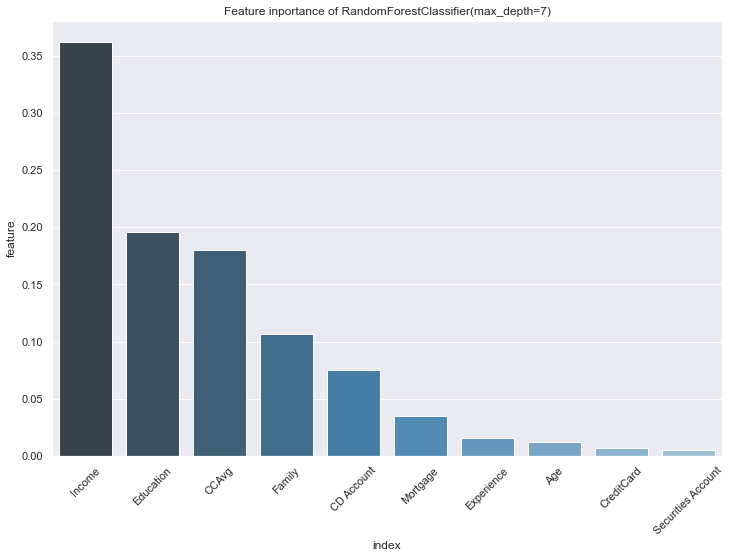

In [284]:
build_feature_importance(rf, x_train, y_train)

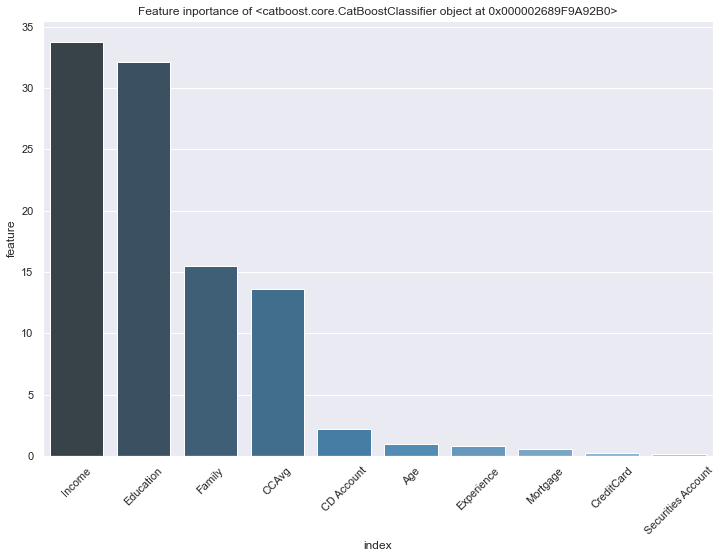

In [285]:
build_feature_importance(cb, x_train, y_train)

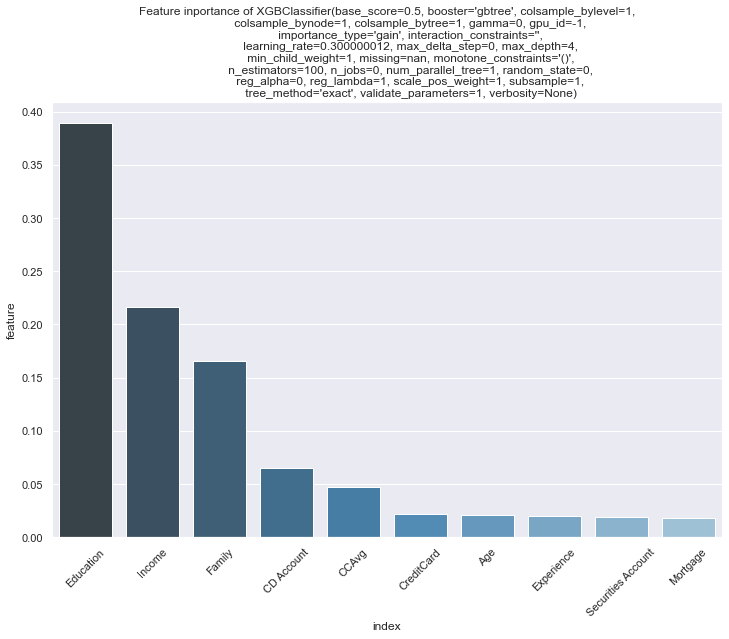

In [286]:
build_feature_importance(xgb, x_train, y_train)